## 1.构建数据集

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression


def make_data():
    num_points = 200
    centers = [[1, 1], [2, 2]]  # 指定中心
    x, y = make_blobs(n_samples=num_points, centers=centers,
                      cluster_std=0.2, random_state=np.random.seed(10))
    index_pos, index_neg = (y == 1), (y == 0)
    plt.rcParams['ytick.direction'] = 'in'  # 刻度向内
    plt.rcParams['xtick.direction'] = 'in'  # 刻度向内
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
    x_pos, x_neg = x[index_pos], x[index_neg]
    plt.scatter(x_pos[:, 0], x_pos[:, 1], marker='o', label='正样本', c='black', s=50)
    plt.scatter(x_neg[:, 0], x_neg[:, 1], marker='s', label='负样本', c='black', s=50)

    # plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
    plt.legend(fontsize=15)
    plt.tight_layout()
    plt.show()
    return x, y

## 2.可视化决策边界

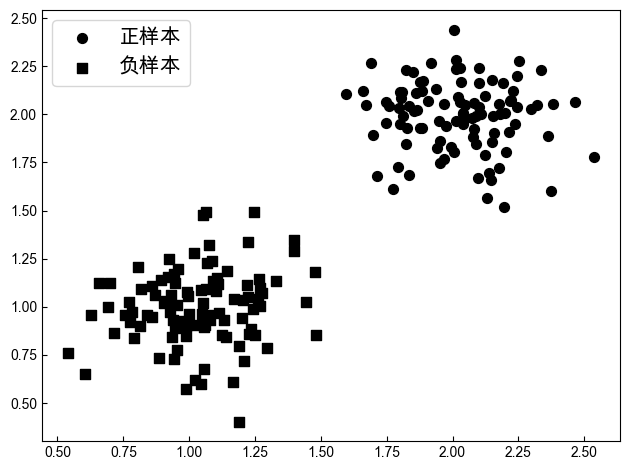

样本点(1,0.5)所属的类标为0
样本点(3,1.5)所属的类标为1


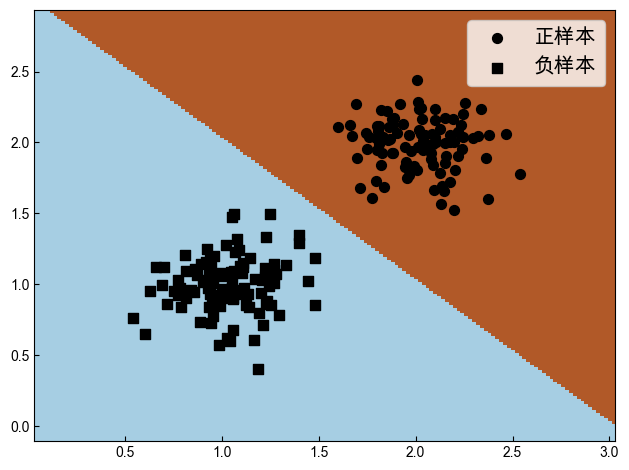

In [3]:
def decision_boundary(x, y):
    ###########  模型求解并预测
    model = LogisticRegression()
    model.fit(x, y)
    pred = model.predict([[1, 0.5], [3, 1.5]])
    print("样本点(1,0.5)所属的类标为{}\n"
          "样本点(3,1.5)所属的类标为{}".format(pred[0], pred[1]))

    ###########  绘制决策面
    x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
    y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
    plt.rcParams['ytick.direction'] = 'in'  # 刻度向内
    plt.rcParams['xtick.direction'] = 'in'  # 刻度向内
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
    h = .02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    x_new = np.hstack([xx.reshape(-1, 1), yy.reshape(-1, 1)])
    Z = model.predict(x_new)
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')

    ###########  绘制原始样本点
    index_pos, index_neg = (y == 1), (y == 0)
    x_pos, x_neg = x[index_pos], x[index_neg]
    plt.scatter(x_pos[:, 0], x_pos[:, 1], marker='o', label='正样本', c='black', s=50)
    plt.scatter(x_neg[:, 0], x_neg[:, 1], marker='s', label='负样本', c='black', s=50)

    # plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
    plt.legend(fontsize=15)
    plt.tight_layout()
    plt.show()


if __name__ == '__main__':
    x, y = make_data()
    decision_boundary(x, y)
